## Data Exploration

This notebook was developed on Ubuntu 20.04, python 3.8.10. It should also work on colab.

In [ ]:
%pip install pandas openpyxl

### Data Preparation (converting to timestamps)

In [2]:
import pandas as pd
from datetime import datetime

# Function to convert semester string to datetime object
def convert_semester_to_date(semester_str):
    if pd.isnull(semester_str):
        return None

    split_str = semester_str.split()
    
    year = split_str[-1]
    season_words = split_str[0:len(split_str)-1] #Because of summer sessions, EG: "Summer One 2022"
    season = ""
    for i in season_words:
        season += i
        

    months = {"Spring": 1, "Summer": 6, "SummerOne" : 5, "SummerTwo" : 7, "Fall": 9}

    return datetime(int(year), months[season], 1)

# Load the Excel file
df = pd.read_excel('/home/lithium/Network-Science-Project/CSCurriculumRevertedData.xlsx')

# Get all the semester columns.
semester_cols = [col for col in df.columns if 'Pass' in col or 'Tran' in col]

for col in semester_cols:
    df[col] = df[col].apply(convert_semester_to_date)

df

,Semester Admitted,Department,Major,CSCI101_Pass_Sem,CSCI101_Tran_Sem,CSCI128_Pass_Sem,CSCI128_Tran_Sem,CSCI200_Pass_C_Sem,CSCI200_Tran_Sem,CSCI210_Pass_Sem,...,CSCI446_Pass_Sem,CSCI448_Pass_Sem,CSCI455_Pass_Sem,CSCI470_Pass_Sem,CSCI471_Pass_Sem,CSCI473_Pass_Sem,CSCI474_Pass_Sem,CSCI475_Pass_Sem,CSCI477_Pass_Sem,CSCI478_Pass_Sem
0,Spring 2019,Interdisciplinary Program,Undrgrnd Const & Tunnel Eng,NaT,NaT,NaT,NaT,NaT,NaT,None,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,Summer 2020,Engineering,Engineering - Mechanical,NaT,NaT,NaT,NaT,NaT,NaT,None,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,Fall 2023,Mechanical Engineering,Mechanical Engineering,NaT,NaT,NaT,NaT,NaT,NaT,None,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,Spring 2021,Interdisciplinary Program,Space Resources,NaT,NaT,NaT,NaT,NaT,NaT,None,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,Spring 2019,Electrical Enginrg & Comp Sci,Electrical Engineering,NaT,NaT,NaT,NaT,NaT,NaT,None,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4050,Fall 2018,Computer Science,Computer Science,2018-09-01,NaT,NaT,NaT,NaT,NaT,None,...,NaT,2022-01-01,2021-09-01,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4051,Fall 2018,Computer Science,Computer Science,2018-09-01,NaT,NaT,NaT,NaT,NaT,None,...,2022-01-01,NaT,NaT,2021-01-01,NaT,NaT,2022-01-01,2021-09-01,2020-01-01,NaT
4052,Fall 2018,Computer Science,Computer Science,2018-09-01,NaT,NaT,NaT,NaT,NaT,None,...,NaT,2021-01-01,NaT,NaT,NaT,NaT,2021-01-01,2020-09-01,2022-01-01,NaT
4053,Fall 2019,Computer Science,Computer Science,NaT,2019-09-01,NaT,NaT,NaT,NaT,None,...,2023-01-01,2022-01-01,NaT,NaT,2021-09-01,NaT,2022-01-01,2022-09-01,2023-01-01,NaT


### Data Analysis

This section of the code is basically just looking at passes for a class over a specific time.

In [34]:
#If multiple classes are in the same category
combined_passes = pd.concat([
    df['CSCI358_Pass_Sem'].dropna(),
    # df['CSCI220_Tran_Sem'].dropna(),
    # df['CSCI261_Pass_C_Sem'].dropna(),
    # df['CSCI261_Tran_Sem'].dropna()
])

#Drop summer sessions.
combined_passes=combined_passes[~combined_passes.dt.month.isin([5, 6, 7])]

combined_passes = combined_passes.value_counts().sort_index()

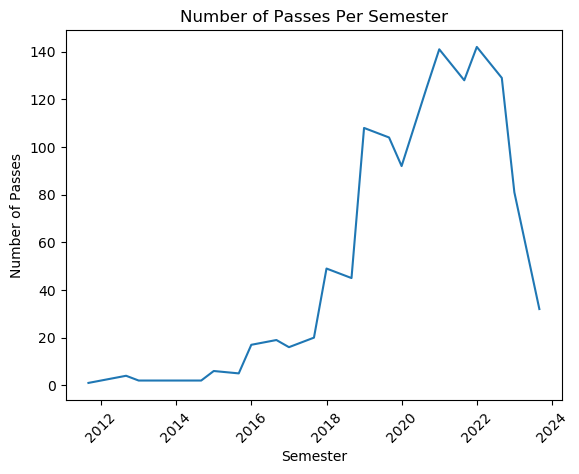

In [35]:
import matplotlib.pyplot as plt

# Plotting
plt.plot(combined_passes)
plt.title('Number of Passes Per Semester')
plt.xlabel('Semester')
plt.ylabel('Number of Passes')
plt.xticks(rotation=45)
plt.show()
